# Lab - 3



### Learning Objective:
Non-deterministic Search | Simulated Annealing

## Problem-1
Travelling Salesman Problem (TSP) is a hard problem, and is simple to state.  Given a  graph in which the nodes are locations of cities, and edges are labelled with the cost of travelling between cities,  find a cycle containing each city exactly once, such that the total cost of the tour is as low as possible.



In [22]:
# This is a function to calculate the euclidean distance between two points
def EuclidDistance(x1, y1, x2, y2):
  return int((((x2-x1)**2) + ((y2-y1)**2))**0.5)

# **Complexity : O(n^3)**

In [23]:
# This is the function which gives best position to start and minimum optiomal cost considering all the nodes considering nearest neighbour heuristic
def BestPath(distances, Nodes):
  # Index of currentcity making it as -1
  currCity = -1
  # Considering intial minDistance as infinity to store the minimum distance after each iteration
  minDistance = float(("inf"))
  
  for i in range(Nodes):
    # Making all the nodes unvisited at the start
    unVisited = [j for j in range(Nodes)]
    unVisited.pop(i)
    currentNode = i
    totalDistance = 0

    # Checking if there is any unvisited city
    while len(unVisited) > 0:
      currIndex = -1
      currDistance = float("inf")

      # Computing the lowest distance from current city
      for index, dist in enumerate(distances[currentNode]):
        if index in unVisited and dist < currDistance:
          currIndex = index
          currDistance = dist
      currentNode = currIndex
      totalDistance += currDistance

      # If there is only one city left then sales person should travel from that node to start city again so adding that node
      if len(unVisited) == 1:
        totalDistance += distances[i][unVisited[0]]
      unVisited.remove(currIndex)

    # Comparing the total distance and the minimum distance
    if totalDistance < minDistance:
      minDistance = totalDistance
      currCity = i
  return [minDistance, currCity]

# **Complexity : O(n^2)**

In [24]:
# This if the function where start node is fixed and it starting adding the nearest nodes to the path
def NearestNeighbourTour(start, distances, X_Location, Y_Location, Nodes):

  # Initially all nodes are unvisited nodes
  unVisitedNodes = [i for i in range(Nodes)]
  startNode = start
  unVisitedNodes.remove(startNode)
  currentNode = startNode

  # Keeping track of X, Y co-ordinates visited till now to plot
  OptimalPathX = [X_Location[startNode]]
  OptimalPathY = [Y_Location[startNode]]
  totalDistance = 0
  while len(unVisitedNodes) > 0:
    currIndex = -1

    # Assuming that the distance between current node and the nearest neighbour is infinity so that we can modify it if we found lower distance
    currDistance = float("inf")
    for index, dist in enumerate(distances[currentNode]):

      # Checking for the nearest neighbour
      if index in unVisitedNodes and dist<currDistance:
        currDistance = dist
        currIndex = index
    if currIndex != -1:
      currentNode = currIndex
      totalDistance += currDistance
      OptimalPathX.append(X_Location[currentNode])
      OptimalPathY.append(Y_Location[currentNode])
    else:
      currIndex = unVisitedNodes[0]
      currentNode = unVisitedNodes[0]

    # If there is single node then adding the path from this node to the start node
    if len(unVisitedNodes) == 1:
      totalDistance += distances[startNode][unVisitedNodes[0]]
    unVisitedNodes.remove(currIndex)
  OptimalPathX.append(X_Location[startNode])
  OptimalPathY.append(Y_Location[startNode])
  return [OptimalPathX, OptimalPathY, totalDistance]

The total distance travelled by sales person is 47


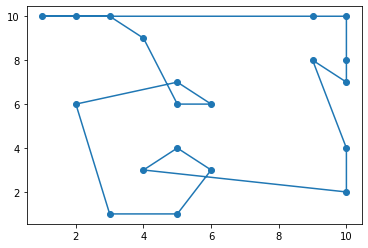

In [25]:
from random import *
import matplotlib.pyplot as plt
# Lets consider there are 20 Nodes which salesman needs to travel
Nodes = 20
# Lets store the distances between two cities with the adjacency matrix
# Let they are located at Graph
# X_Location, Y_Location would have the co-ordinates of the cities
X_Location = []
Y_Location = []
for i in range(Nodes):
  X_Location.append(randint(1, 10))
  Y_Location.append(randint(1, 10))
plt.scatter(X_Location, Y_Location)
distances = [[0 for i in range(Nodes)] for j in range(Nodes)]

# Computing the distances between the two nodes
for i in range(Nodes):
  for j in range(i,Nodes):
    distances[i][j] = distances[j][i] = EuclidDistance(X_Location[i], Y_Location[i], X_Location[j], Y_Location[j])
[X, Y, distance] = NearestNeighbourTour(0, distances, X_Location, Y_Location, Nodes)
print("The total distance travelled by sales person is " + str(distance))
plt.plot(X, Y)


The minimum distance travelled would have been 45 if he would have travelled from 6


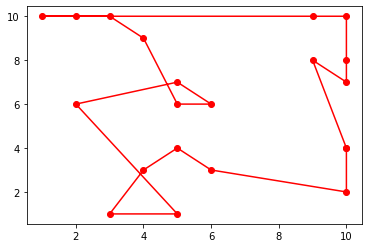

In [26]:
# Finding the best node to get started using Nearest neighbour heuristic
[distance, city] = BestPath(distances, Nodes)
print("The minimum distance travelled would have been " + str(distance) + " if he would have travelled from " + str(city))
[X, Y, distance] = NearestNeighbourTour(city, distances, X_Location, Y_Location, Nodes)
plt.plot(X,Y, marker='o', color='red')

In [27]:
def generateMatrixFromCosts(file):
  # Reading the file of VLSI co ordinates to store the X, Y of VLSI dataset
  with open(file, 'r')  as f:
    firstLine = f.readline()
    Nodes = int(firstLine)
    Lines = f.readlines()
    X_Location = []
    Y_Location = []
    for line in Lines:
        val, node1, node2 = [int(a) for a in line.split(' ')]
        X_Location.append(node1)
        Y_Location.append(node2)
    return [X_Location, Y_Location, Nodes]

In [28]:
import random
import math

In [29]:
# This function calculates the euclidean distance of current chosen solution
def EnergyFunction(Nodes, Distances):
    energy = 0
    length = len(Nodes)
    for i in range(length-1):
      energy += Distances[Nodes[i]][Nodes[i+1]]
    energy += Distances[Nodes[length-1]][Nodes[0]]
    return energy

In [30]:
# Simulated annealing randomized search
def SimulatedAnnealing(Number, Distances):
  Nodes = [i for i in range(Number)]
  random.shuffle(Nodes)
  Initial = [node for node in Nodes]
  # The temperature
  T = Number/2  
  # T = 10
  factor = 0.99
  for i in range(1000):
    T = T*factor
    Energy1 = EnergyFunction(Nodes, Distances)
    for j in range(500):
      # Swapping a node and computing the distance
      x = random.randint(0, Number-1)
      y = random.randint(0, Number-1)
      Nodes[x], Nodes[y] = Nodes[y], Nodes[x]
      Energy2 = EnergyFunction(Nodes, Distances)
      randomValue = random.random()
      if Energy2 < Energy1:
        Energy1 = Energy2
      else:
        if randomValue < math.exp((Energy1-Energy2)/T):
          Energy1 = Energy2
        else:
          Nodes[x], Nodes[y] = Nodes[y], Nodes[x]
          
  return Nodes, Initial
    

In [39]:
# Computing best choice using simulated annealing
bestChoiceNodes, Initial = SimulatedAnnealing(Nodes, distances)

The total distance travelled by sales person is : 39


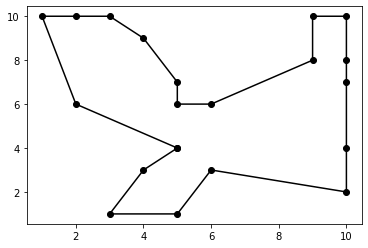

In [40]:
OptimalSimulatedX = []
OptimalSimulatedY = []
for i in range(len(bestChoiceNodes)):
  OptimalSimulatedX.append(X_Location[bestChoiceNodes[i]])
  OptimalSimulatedY.append(Y_Location[bestChoiceNodes[i]])
OptimalSimulatedX.append(X_Location[bestChoiceNodes[0]])
OptimalSimulatedY.append(Y_Location[bestChoiceNodes[0]])
print("The total distance travelled by sales person is : " + str(EnergyFunction(bestChoiceNodes, distances)))
plt.plot(OptimalSimulatedX,OptimalSimulatedY, marker='o', color='black')

In [33]:
# This function computes the distances from every neighbour
def getDistances(Nodes, X_Location, Y_Location):
  distances = [[0 for i in range(Nodes)] for j in range(Nodes)]
  for i in range(Nodes):
    for j in range(i+1, Nodes):
      distances[i][j] = distances[j][i] = EuclidDistance(X_Location[i], Y_Location[i], X_Location[j], Y_Location[j])
  return distances

In [34]:
# This is function which gives co ordinates of permutation of nodes
def PointsToPlot(X_Location, Y_Location, NodesSet):
  plotX = []
  plotY = []
  for i in range(len(NodesSet)):
    plotX.append(X_Location[NodesSet[i]])
    plotY.append(Y_Location[NodesSet[i]])
  plotX.append(X_Location[NodesSet[0]])
  plotY.append(Y_Location[NodesSet[0]])
  return plotX, plotY

The total distance travelled by sales person is : 4702


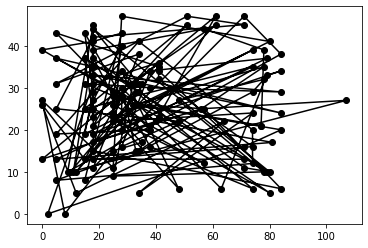

In [39]:
# VLSI Instances
X_Location, Y_Location, Nodes = generateMatrixFromCosts("1.txt")
distances = getDistances(Nodes, X_Location, Y_Location)
bestChoiceNodes, Initial = SimulatedAnnealing(Nodes, distances)
InitialSimulatedX, InitialSimulatedY = PointsToPlot(X_Location, Y_Location, Initial)
print("The total distance travelled by sales person is : " + str(EnergyFunction(Initial, distances)))
plt.plot(InitialSimulatedX,InitialSimulatedY, marker='o', color='black')

The total distance travelled by sales person is : 698


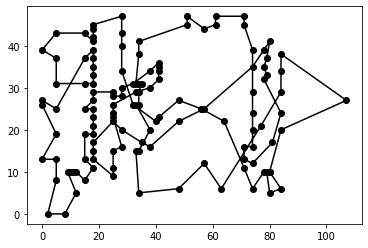

In [40]:
OptimalSimulatedX, OptimalSimulatedY = PointsToPlot(X_Location, Y_Location, bestChoiceNodes)
print("The total distance travelled by sales person is : " + str(EnergyFunction(bestChoiceNodes, distances)))
plt.plot(OptimalSimulatedX,OptimalSimulatedY, marker='o', color='black')

The minimum distance travelled would have been 45 if he would have travelled from 6


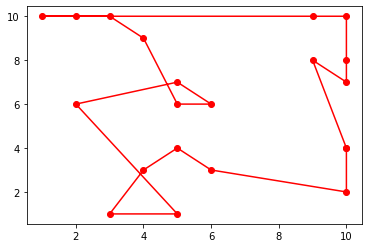

In [37]:
[distance, city] = BestPath(distances, Nodes)
print("The minimum distance travelled would have been " + str(distance) + " if he would have travelled from " + str(city))
[X, Y, distance] = NearestNeighbourTour(city, distances, X_Location, Y_Location, Nodes)
plt.plot(X,Y, marker='o', color='red')

The total distance travelled by sales person is : 12424


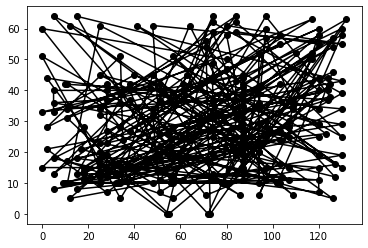

In [15]:
X_Location, Y_Location, Nodes = generateMatrixFromCosts("3.txt")
distances = getDistances(Nodes, X_Location, Y_Location)
bestChoiceNodes, Initial = SimulatedAnnealing(Nodes, distances)
InitialSimulatedX, InitialSimulatedY = PointsToPlot(X_Location, Y_Location, Initial)
print("The total distance travelled by sales person is : " + str(EnergyFunction(Initial, distances)))
plt.plot(InitialSimulatedX,InitialSimulatedY, marker='o', color='black')

The total distance travelled by sales person is : 1844


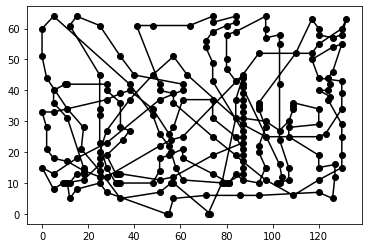

In [16]:
OptimalSimulatedX, OptimalSimulatedY = PointsToPlot(X_Location, Y_Location, bestChoiceNodes)
print("The total distance travelled by sales person is : " + str(EnergyFunction(bestChoiceNodes, distances)))
plt.plot(OptimalSimulatedX,OptimalSimulatedY, marker='o', color='black')

The total distance travelled by sales person is : 37363


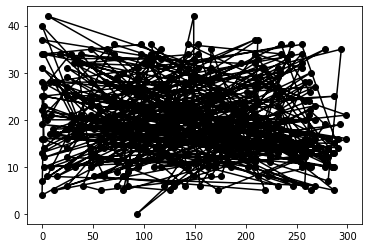

In [17]:
X_Location, Y_Location, Nodes = generateMatrixFromCosts("2.txt")
distances = getDistances(Nodes, X_Location, Y_Location)
bestChoiceNodes, Initial = SimulatedAnnealing(Nodes, distances)
InitialSimulatedX, InitialSimulatedY = PointsToPlot(X_Location, Y_Location, Initial)
print("The total distance travelled by sales person is : " + str(EnergyFunction(Initial, distances)))
plt.plot(InitialSimulatedX,InitialSimulatedY, marker='o', color='black')

The total distance travelled by sales person is : 2983


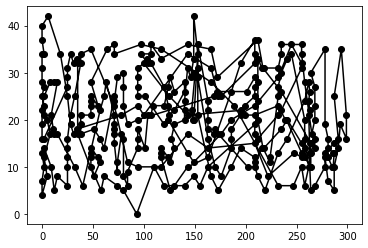

In [18]:
OptimalSimulatedX, OptimalSimulatedY = PointsToPlot(X_Location, Y_Location, bestChoiceNodes)
print("The total distance travelled by sales person is : " + str(EnergyFunction(bestChoiceNodes, distances)))
plt.plot(OptimalSimulatedX,OptimalSimulatedY, marker='o', color='black')

References : A first course in Artificial Intelligence by Deepak Khemani